# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.cluster import (KMeans, MiniBatchKMeans, AffinityPropagation, MeanShift, SpectralClustering,
                             AgglomerativeClustering, DBSCAN, OPTICS, Birch)
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from feature_engine.encoding import CountFrequencyEncoder
from IPython.display import clear_output
clear_output()

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [132]:
df = pd.read_csv('beverage.csv')
df

Order_ID Customer_ID Customer_Type         Product  \
0      ORD670338     CUS9135           B2B           Pepsi   
1      ORD408075     CUS6689           B2C  San Pellegrino   
2      ORD786301     CUS4927           B2C    Jack Daniels   
3     ORD1327532     CUS2261           B2C         Bacardi   
4       ORD64826     CUS1244           B2C      Fritz-Kola   
...          ...         ...           ...             ...   
4995   ORD507272     CUS2799           B2C      Warsteiner   
4996   ORD604608     CUS1442           B2C    Volvic Touch   
4997   ORD965686     CUS6730           B2C    Volvic Touch   
4998  ORD1867112     CUS9121           B2B  Hohes C Orange   
4999  ORD1702230     CUS8018           B2C          Volvic   

                 Category  Unit_Price  Quantity  Discount  Total_Price  \
0             Soft Drinks        1.12        59      0.05        62.78   
1                   Water        0.89         1      0.00         0.89   
2     Alcoholic Beverages       50.25        11      0.00       552.75   
3     Alcoholic Beverages       14.26        11      0.00       156.86   
4             Soft Drinks        1.99         7      0.00        13.93   
...                   ...         ...       ...       ...          ...   
4995  Alcoholic Beverages        1.02         7      0.00         7.14   
4996                Water        1.46        10      0.00        14.60   
4997                Water        1.46         1      0.00         1.46   
4998               Juices        2.44        77      0.05       178.49   
4999                Water        0.57         3      0.00         1.71   

                      Region  Order_Date  
0             Sachsen-Anhalt  2022-12-16  
1                    Sachsen  2022-03-24  
2                   Saarland  2022-03-26  
3                    Hamburg  2023-12-03  
4                   Saarland  2021-11-10  
...                      ...         ...  
4995                  Bremen  2021-05-29  
4996  Mecklenburg-Vorpommern  2023-03-26  
4997         Rheinland-Pfalz  2023-04-01  
4998                Saarland  2022-11-11  
4999           Niedersachsen  2022-10-04  

[5000 rows x 11 columns]

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       5000 non-null   object 
 1   Customer_ID    5000 non-null   object 
 2   Customer_Type  5000 non-null   object 
 3   Product        5000 non-null   object 
 4   Category       5000 non-null   object 
 5   Unit_Price     5000 non-null   float64
 6   Quantity       5000 non-null   int64  
 7   Discount       5000 non-null   float64
 8   Total_Price    5000 non-null   float64
 9   Region         5000 non-null   object 
 10  Order_Date     5000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 429.8+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [134]:
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col not in ['Order_ID', 'Customer_ID', 'Product', 'Region', 'Order_Date']]
display(numerical_columns, categorical_columns)

['Unit_Price', 'Quantity', 'Discount', 'Total_Price']

['Customer_Type', 'Category']

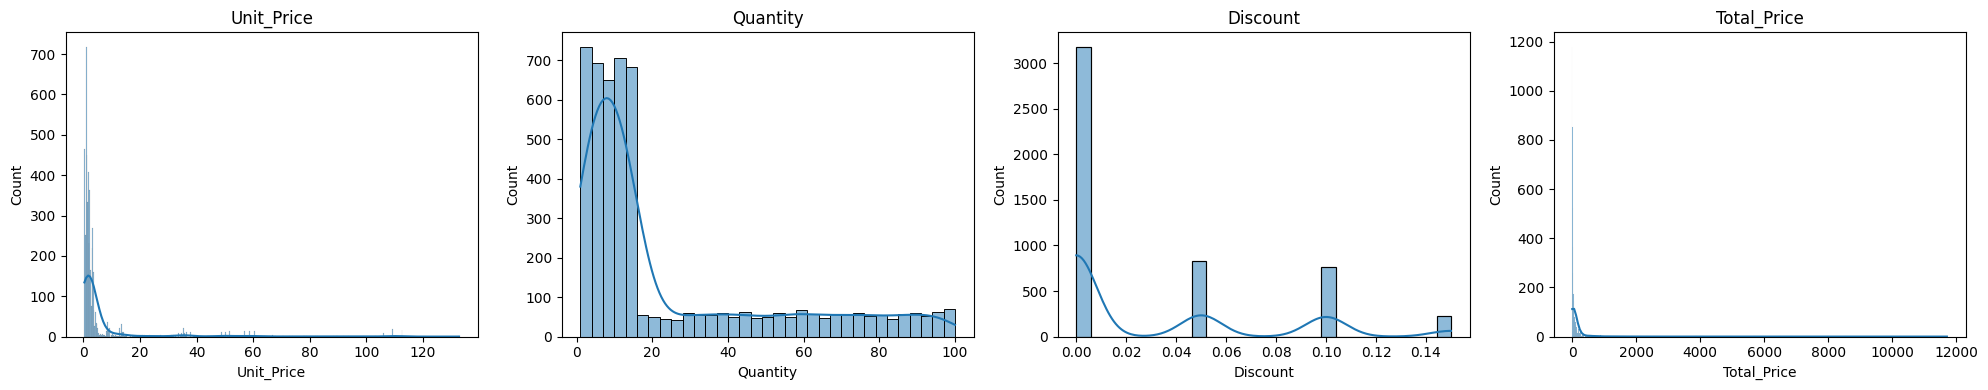

In [135]:
n = len(numerical_columns)
width = 4
height = int(np.ceil(n / width))  # Konversi ke integer

fig, axes = plt.subplots(height, width, figsize=(5 * width, 4 * height))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

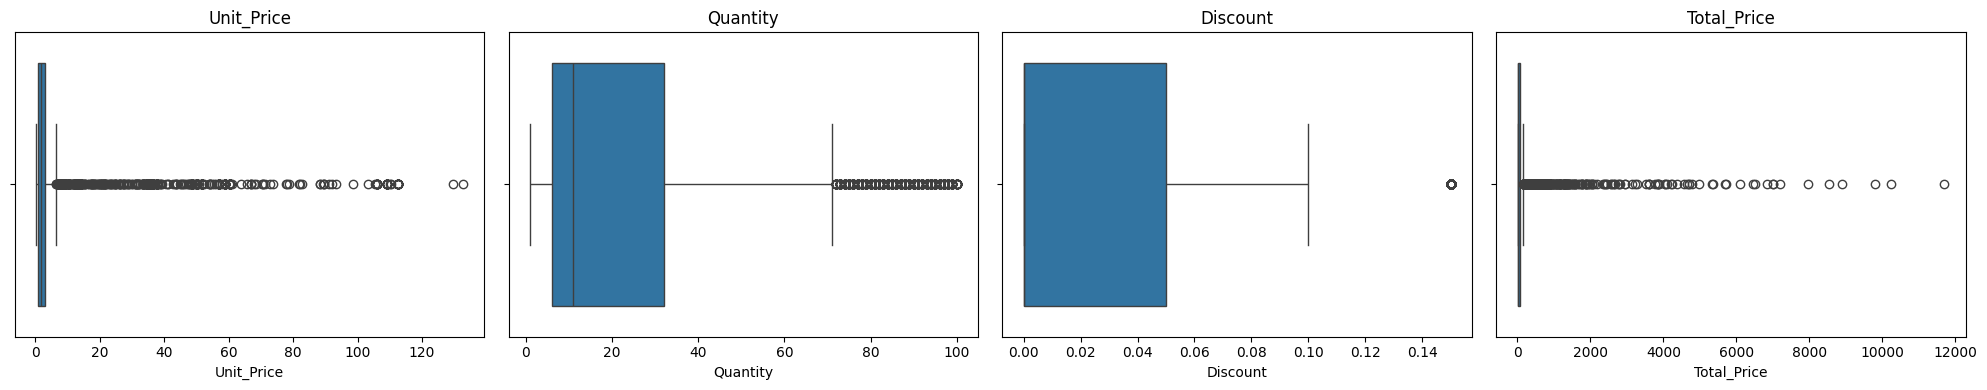

In [136]:
n = len(numerical_columns)
width = 4
height = int(np.ceil(n / width))  # Konversi ke integer

fig, axes = plt.subplots(height, width, figsize=(5 * width, 4 * height))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

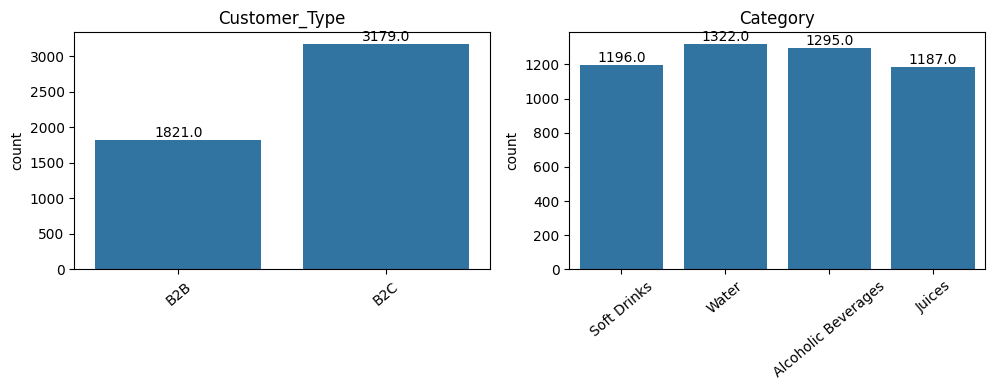

In [137]:
n = len(categorical_columns)
width = 3
height = int(np.ceil(n / width))  # Konversi ke integer

fig, axes = plt.subplots(height, width, figsize=(5 * width, 4 * height))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=40)
    axes[i].set_xlabel('')
    axes[i].set_title(col)
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height}',
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points')

# Hapus subplot kosong yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

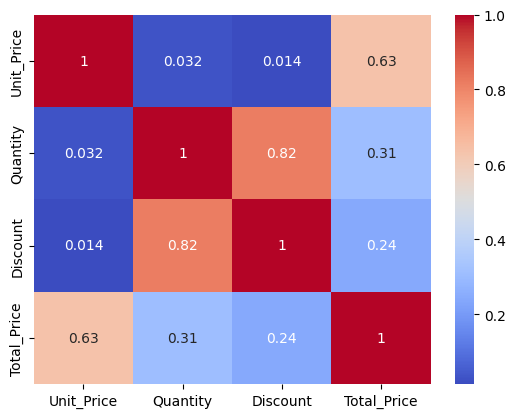

In [138]:
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')  

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [141]:
for col in categorical_columns:
    print(f'{col} : {df[col].nunique()}')

Customer_Type : 2
Category : 4


## Encoding

- OneHotEncoder untuk column yang nuniquenya <5
- CountFrequencyEncoder untuk column yang nuniquenya >5

In [139]:
#Type your code here
ce = CountFrequencyEncoder()
ohe = OneHotEncoder(sparse_output=False)
df_new = df.copy()
df_new['Order_Date'] = pd.to_datetime(df_new['Order_Date'])
df_new['Last_Order_Date'] = (df_new['Order_Date'].max() - df_new['Order_Date']).dt.days
df_new.drop(columns=['Order_ID', 'Customer_ID', 'Order_Date'], inplace=True)
df_new[['Product', 'Region']] = ce.fit_transform(df[['Product', 'Region']])
# Definisikan kolom kategori yang akan diencoding dengan OneHotEncoder
categorical_cols = ['Customer_Type', 'Category']

# Lakukan fitting dan transformasi dengan OneHotEncoder
ohe_data = ohe.fit_transform(df_new[categorical_cols])
# Dapatkan nama kolom hasil encoding
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
# Buat DataFrame dari hasil one-hot encoding dengan index yang sama
df_ohe = pd.DataFrame(ohe_data, columns=ohe_feature_names, index=df_new.index)

# Gabungkan hasil one-hot encoding dengan DataFrame asli (setelah menghapus kolom kategori)
df_new = df_new.drop(columns=categorical_cols)
df_new = pd.concat([df_new, df_ohe], axis=1)
df_new

Product  Unit_Price  Quantity  Discount  Total_Price  Region  \
0         107        1.12        59      0.05        62.78     289   
1         153        0.89         1      0.00         0.89     317   
2          59       50.25        11      0.00       552.75     303   
3          63       14.26        11      0.00       156.86     331   
4         118        1.99         7      0.00        13.93     303   
...       ...         ...       ...       ...          ...     ...   
4995       74        1.02         7      0.00         7.14     315   
4996      139        1.46        10      0.00        14.60     311   
4997      139        1.46         1      0.00         1.46     329   
4998      174        2.44        77      0.05       178.49     303   
4999      157        0.57         3      0.00         1.71     342   

      Last_Order_Date  Customer_Type_B2B  Customer_Type_B2C  \
0                 379                1.0                0.0   
1                 646                0.0                1.0   
2                 644                0.0                1.0   
3                  27                0.0                1.0   
4                 780                0.0                1.0   
...               ...                ...                ...   
4995              945                0.0                1.0   
4996              279                0.0                1.0   
4997              273                0.0                1.0   
4998              414                1.0                0.0   
4999              452                0.0                1.0   

      Category_Alcoholic Beverages  Category_Juices  Category_Soft Drinks  \
0                              0.0              0.0                   1.0   
1                              0.0              0.0                   0.0   
2                              1.0              0.0                   0.0   
3                              1.0              0.0                   0.0   
4                              0.0              0.0                   1.0   
...                            ...              ...                   ...   
4995                           1.0              0.0                   0.0   
4996                           0.0              0.0                   0.0   
4997                           0.0              0.0                   0.0   
4998                           0.0              1.0                   0.0   
4999                           0.0              0.0                   0.0   

      Category_Water  
0                0.0  
1                1.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
4995             0.0  
4996             1.0  
4997             1.0  
4998             0.0  
4999             1.0  

[5000 rows x 13 columns]

In [142]:
display(df_new.duplicated().sum(), df_new.isnull().sum())

0

Product                         0
Unit_Price                      0
Quantity                        0
Discount                        0
Total_Price                     0
Region                          0
Last_Order_Date                 0
Customer_Type_B2B               0
Customer_Type_B2C               0
Category_Alcoholic Beverages    0
Category_Juices                 0
Category_Soft Drinks            0
Category_Water                  0
dtype: int64

In [143]:
df_new.describe()

Product   Unit_Price     Quantity     Discount   Total_Price  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean    121.582000     5.871872    23.466800     0.030340    138.985716   
std      41.169302    14.971939    27.224554     0.045088    576.343668   
min      51.000000     0.340000     1.000000     0.000000      0.330000   
25%      82.000000     1.040000     6.000000     0.000000      8.190000   
50%     131.000000     1.750000    11.000000     0.000000     21.175000   
75%     159.000000     3.210000    32.000000     0.050000     70.432500   
max     185.000000   132.700000   100.000000     0.150000  11704.140000   

            Region  Last_Order_Date  Customer_Type_B2B  Customer_Type_B2C  \
count  5000.000000      5000.000000        5000.000000        5000.000000   
mean    313.317600       550.542200           0.364200           0.635800   
std      16.031398       316.039524           0.481253           0.481253   
min     285.000000         0.000000           0.000000           0.000000   
25%     303.000000       272.000000           0.000000           0.000000   
50%     312.000000       557.000000           0.000000           1.000000   
75%     329.000000       825.000000           1.000000           1.000000   
max     342.000000      1093.000000           1.000000           1.000000   

       Category_Alcoholic Beverages  Category_Juices  Category_Soft Drinks  \
count                   5000.000000      5000.000000           5000.000000   
mean                       0.259000         0.237400              0.239200   
std                        0.438129         0.425532              0.426638   
min                        0.000000         0.000000              0.000000   
25%                        0.000000         0.000000              0.000000   
50%                        0.000000         0.000000              0.000000   
75%                        1.000000         0.000000              0.000000   
max                        1.000000         1.000000              1.000000   

       Category_Water  
count     5000.000000  
mean         0.264400  
std          0.441057  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          1.000000  
max          1.000000

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

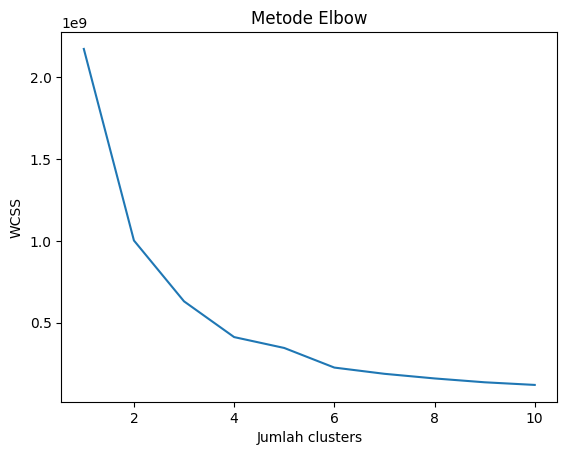

In [144]:
#Type your code here
#Type your code here
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

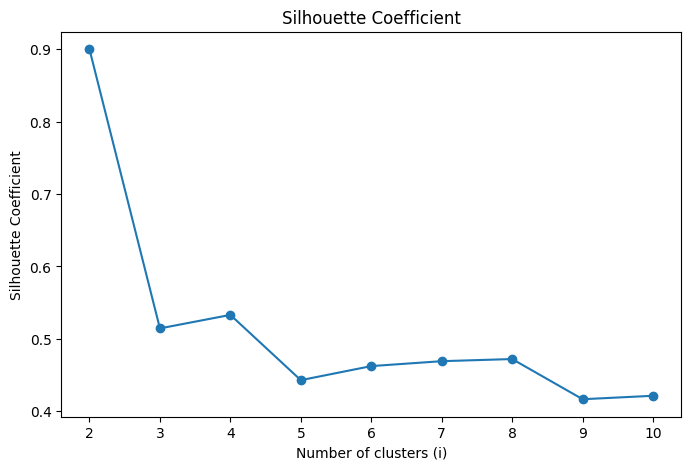

In [145]:
silhouette_scores = []      
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_new)
    silhouette_scores.append(silhouette_score(df_new, kmeans.labels_))

# Menampilkan Silhouette Coefficient
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (i)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### 3 Clusters

In [146]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_new)

silhouette_score(df_new, kmeans.labels_)

0.5142908573393744

### 2 Clusters

In [147]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_new)

silhouette_score(df_new, kmeans.labels_)

0.9002038238812667

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### Numeric Column Only

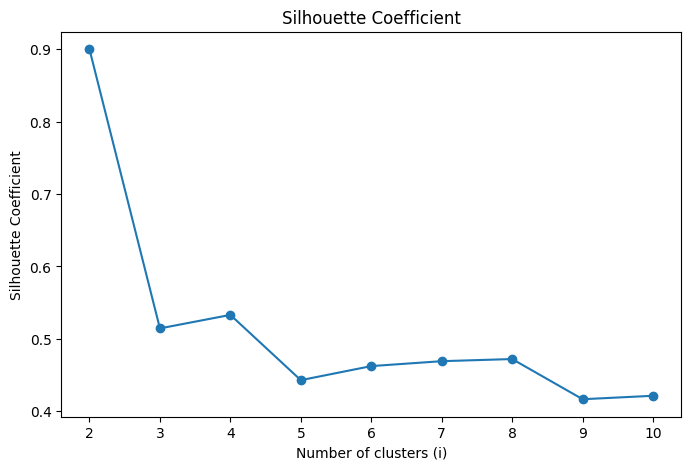

In [148]:
numeric_features = df_new.select_dtypes(include=[np.number]).columns.tolist()

silhouette_scores = []      
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_new[numeric_features])
    silhouette_scores.append(silhouette_score(df_new[numeric_features], kmeans.labels_))

# Menampilkan Silhouette Coefficient
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (i)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient')
plt.show()

### Scaling

In [149]:
ss = StandardScaler()
mm = MinMaxScaler()
rs = RobustScaler()
df_new_ss = df_new.copy()
df_new_mm = df_new.copy()
df_new_rs = df_new.copy()

df_new_ss[numeric_features] = ss.fit_transform(df_new_ss[numeric_features])
df_new_mm[numeric_features] = mm.fit_transform(df_new_mm[numeric_features])
df_new_rs[numeric_features] = rs.fit_transform(df_new_rs[numeric_features])

#### Standard Scaler

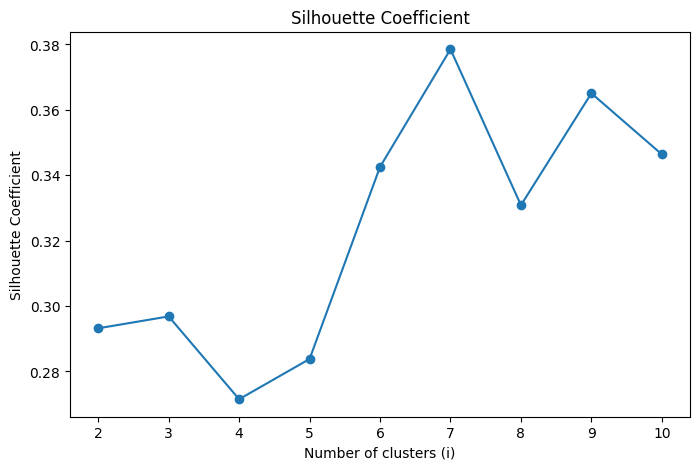

In [150]:
silhouette_scores = []      
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_new_ss)
    silhouette_scores.append(silhouette_score(df_new_ss, kmeans.labels_))

# Menampilkan Silhouette Coefficient
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (i)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient')
plt.show()

#### MinMaxScaler

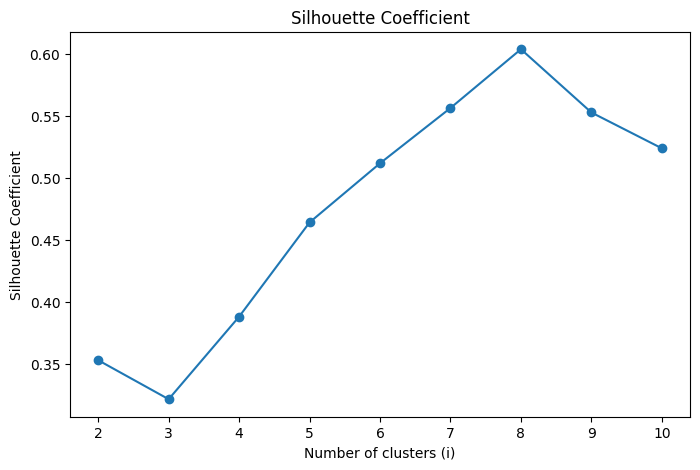

In [151]:
silhouette_scores = []      
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_new_mm)
    silhouette_scores.append(silhouette_score(df_new_mm, kmeans.labels_))

# Menampilkan Silhouette Coefficient
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (i)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient')
plt.show()

#### RobustScaler

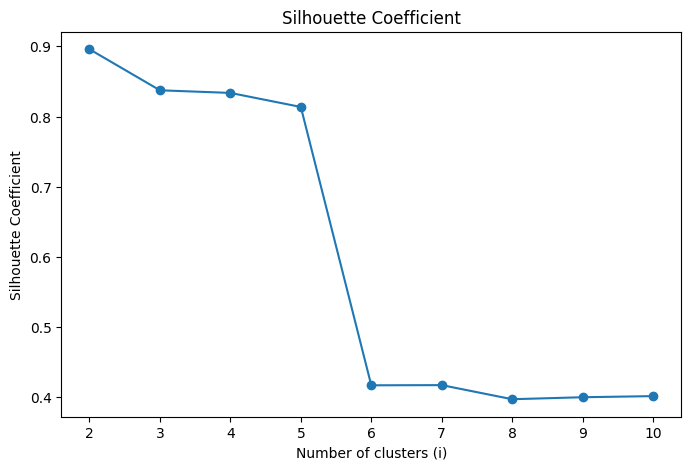

In [152]:
silhouette_scores = []      
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_new_rs)
    silhouette_scores.append(silhouette_score(df_new_rs, kmeans.labels_))

# Menampilkan Silhouette Coefficient
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (i)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient')
plt.show()

### Evaluasi Model Clustering (Setelah feature selection & scaling)

In [153]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_new_rs)

silhouette_score(df_new_rs, kmeans.labels_)

0.8958888626597663

In [154]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_new_rs)

silhouette_score(df_new_rs, kmeans.labels_)

0.8373645405845797

In [155]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_new_rs)

silhouette_score(df_new_rs, kmeans.labels_)

0.833630832450434

In [156]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_new_rs)

silhouette_score(df_new_rs, kmeans.labels_)

0.8136099480729327

### Final Cluster = 2 Clusters

In [157]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_new_rs)
df_new_rs['Cluster'] = kmeans.labels_

silhouette_score(df_new_rs, kmeans.labels_)

0.8959115619522021

In [158]:
df_new_rs['Cluster'].value_counts(normalize=True)

Cluster
0    0.9742
1    0.0258
Name: proportion, dtype: float64

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

<Axes: xlabel='Last_Order_Date', ylabel='Total_Price'>

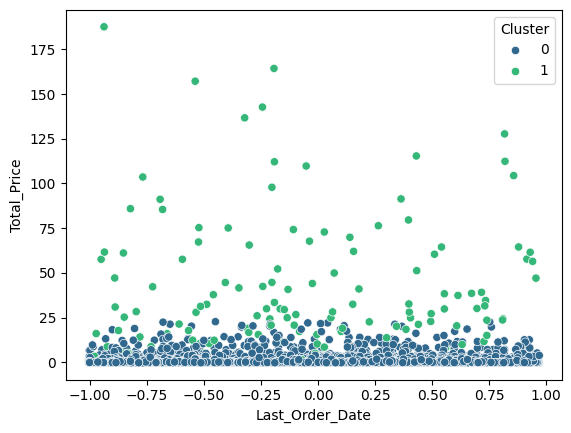

In [159]:
sns.scatterplot(data=df_new_rs, x='Last_Order_Date', y='Total_Price', hue='Cluster', palette='viridis')

<Axes: xlabel='Product', ylabel='Total_Price'>

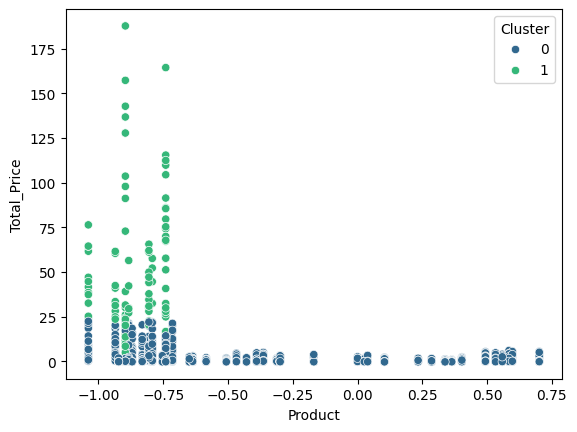

In [160]:
sns.scatterplot(data=df_new_rs, x='Product', y='Total_Price', hue='Cluster', palette='viridis')

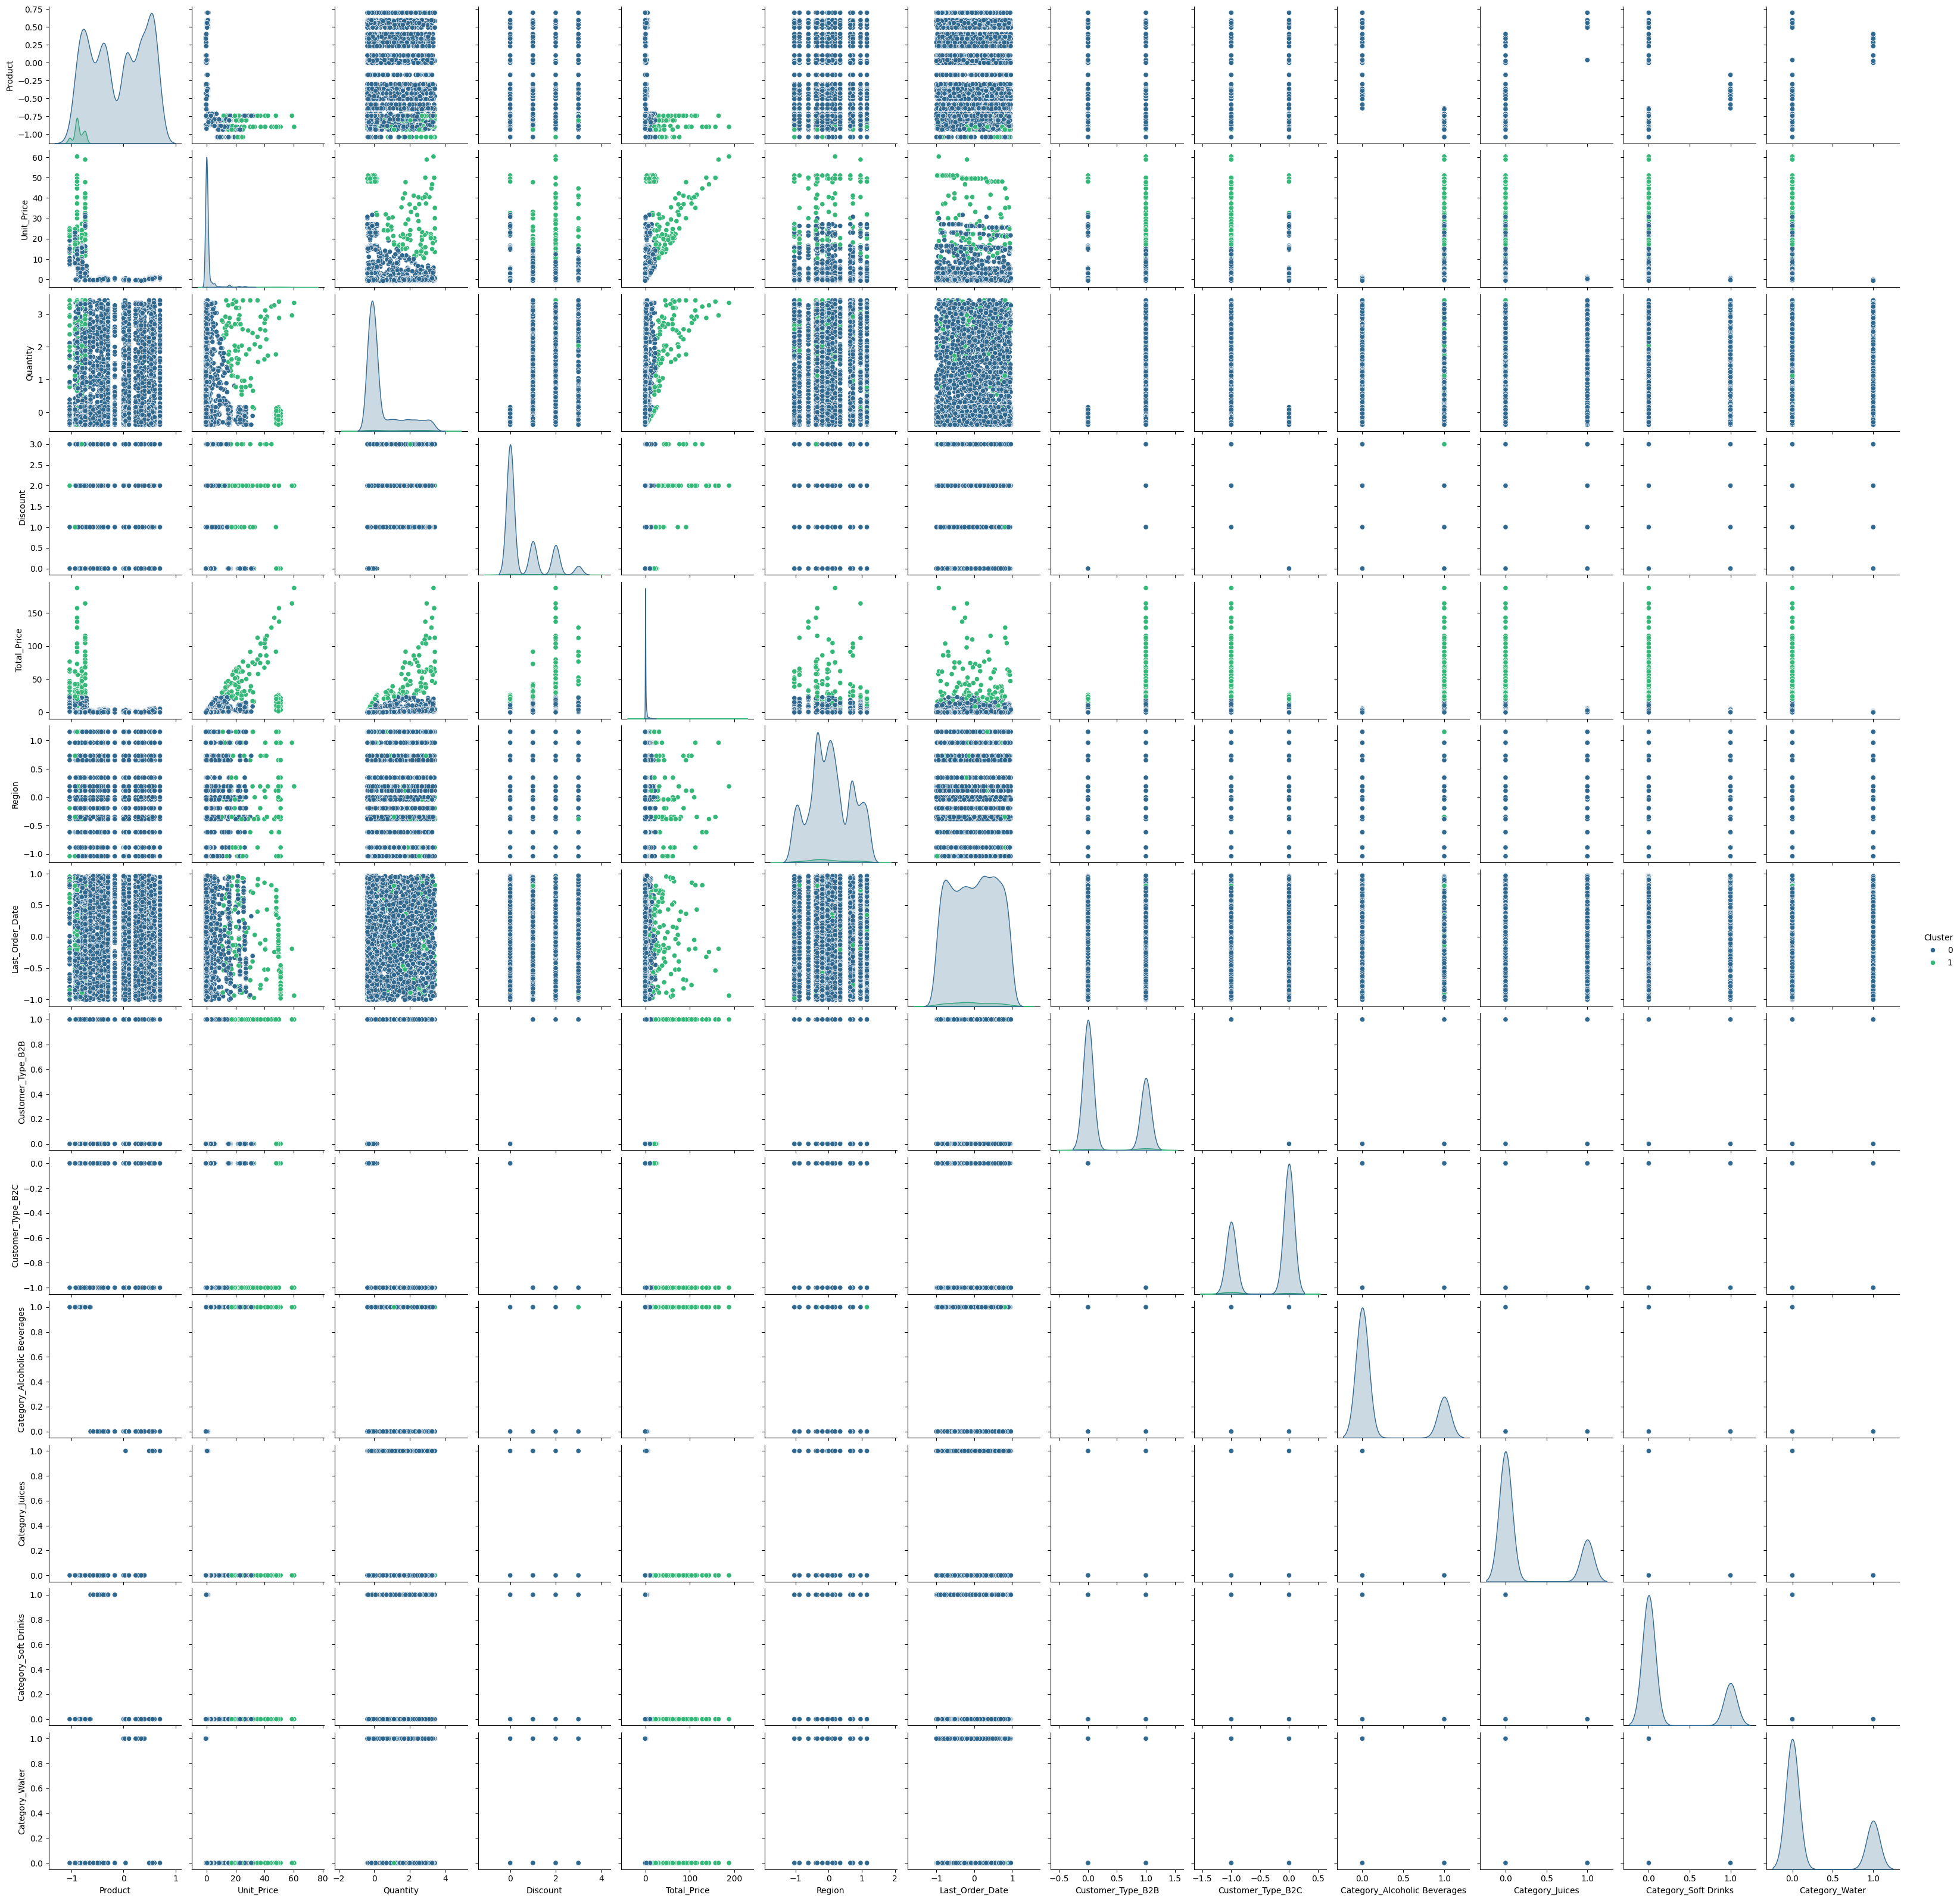

In [161]:
sns.pairplot(df_new_rs, hue='Cluster', vars=numeric_features, palette='viridis')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [164]:
df_new_rs[numeric_features] = rs.inverse_transform(df_new_rs[numeric_features])
df_new_rs

Product  Unit_Price  Quantity  Discount  Total_Price  Region  \
0       107.0        1.12      59.0      0.05        62.78   289.0   
1       153.0        0.89       1.0      0.00         0.89   317.0   
2        59.0       50.25      11.0      0.00       552.75   303.0   
3        63.0       14.26      11.0      0.00       156.86   331.0   
4       118.0        1.99       7.0      0.00        13.93   303.0   
...       ...         ...       ...       ...          ...     ...   
4995     74.0        1.02       7.0      0.00         7.14   315.0   
4996    139.0        1.46      10.0      0.00        14.60   311.0   
4997    139.0        1.46       1.0      0.00         1.46   329.0   
4998    174.0        2.44      77.0      0.05       178.49   303.0   
4999    157.0        0.57       3.0      0.00         1.71   342.0   

      Last_Order_Date  Customer_Type_B2B  Customer_Type_B2C  \
0               379.0                1.0                0.0   
1               646.0                0.0                1.0   
2               644.0                0.0                1.0   
3                27.0                0.0                1.0   
4               780.0                0.0                1.0   
...               ...                ...                ...   
4995            945.0                0.0                1.0   
4996            279.0                0.0                1.0   
4997            273.0                0.0                1.0   
4998            414.0                1.0                0.0   
4999            452.0                0.0                1.0   

      Category_Alcoholic Beverages  Category_Juices  Category_Soft Drinks  \
0                              0.0              0.0                   1.0   
1                              0.0              0.0                   0.0   
2                              1.0              0.0                   0.0   
3                              1.0              0.0                   0.0   
4                              0.0              0.0                   1.0   
...                            ...              ...                   ...   
4995                           1.0              0.0                   0.0   
4996                           0.0              0.0                   0.0   
4997                           0.0              0.0                   0.0   
4998                           0.0              1.0                   0.0   
4999                           0.0              0.0                   0.0   

      Category_Water  Cluster  
0                0.0        0  
1                1.0        0  
2                0.0        0  
3                0.0        0  
4                0.0        0  
...              ...      ...  
4995             0.0        0  
4996             1.0        0  
4997             1.0        0  
4998             0.0        0  
4999             1.0        0  

[5000 rows x 14 columns]

In [167]:
# Ekstrak kembali kolom one-hot yang sudah di-encode
df_ohe_extracted = df_new_rs[ohe_feature_names]

# Lakukan inverse transform untuk mendapatkan kembali nilai kategori asli
inverse_categories = ohe.inverse_transform(df_ohe_extracted)

# Buat DataFrame untuk kolom kategori asli dengan index yang sama
df_inverse = pd.DataFrame(inverse_categories, columns=categorical_cols, index=df_new_rs.index)

# Hapus kolom one-hot encoding dan gabungkan dengan data kategori asli
df_final = df_new_rs.drop(columns=ohe_feature_names)
df_final = pd.concat([df_final, df_inverse], axis=1)
df_final

Product  Unit_Price  Quantity  Discount  Total_Price  Region  \
0       107.0        1.12      59.0      0.05        62.78   289.0   
1       153.0        0.89       1.0      0.00         0.89   317.0   
2        59.0       50.25      11.0      0.00       552.75   303.0   
3        63.0       14.26      11.0      0.00       156.86   331.0   
4       118.0        1.99       7.0      0.00        13.93   303.0   
...       ...         ...       ...       ...          ...     ...   
4995     74.0        1.02       7.0      0.00         7.14   315.0   
4996    139.0        1.46      10.0      0.00        14.60   311.0   
4997    139.0        1.46       1.0      0.00         1.46   329.0   
4998    174.0        2.44      77.0      0.05       178.49   303.0   
4999    157.0        0.57       3.0      0.00         1.71   342.0   

      Last_Order_Date  Cluster Customer_Type             Category  
0               379.0        0           B2B          Soft Drinks  
1               646.0        0           B2C                Water  
2               644.0        0           B2C  Alcoholic Beverages  
3                27.0        0           B2C  Alcoholic Beverages  
4               780.0        0           B2C          Soft Drinks  
...               ...      ...           ...                  ...  
4995            945.0        0           B2C  Alcoholic Beverages  
4996            279.0        0           B2C                Water  
4997            273.0        0           B2C                Water  
4998            414.0        0           B2B               Juices  
4999            452.0        0           B2C                Water  

[5000 rows x 10 columns]

Inverse transform tidak diterapkan pada kolom yang telah di-encoding menggunakan Count Frequency Encoder karena jumlah unique value yang sangat banyak, sehingga hasil inverse transform sulit diinterpretasikan. Count Frequency Encoding tetap memberikan informasi yang bermakna dalam clustering, yaitu frekuensi kemunculan kategori dalam data, yang lebih mudah dianalisis dibandingkan kategori aslinya. Selain itu, inverse transform dapat menghasilkan terlalu banyak variasi kategori dalam tiap cluster, membuat interpretasi karakteristik cluster menjadi kurang jelas

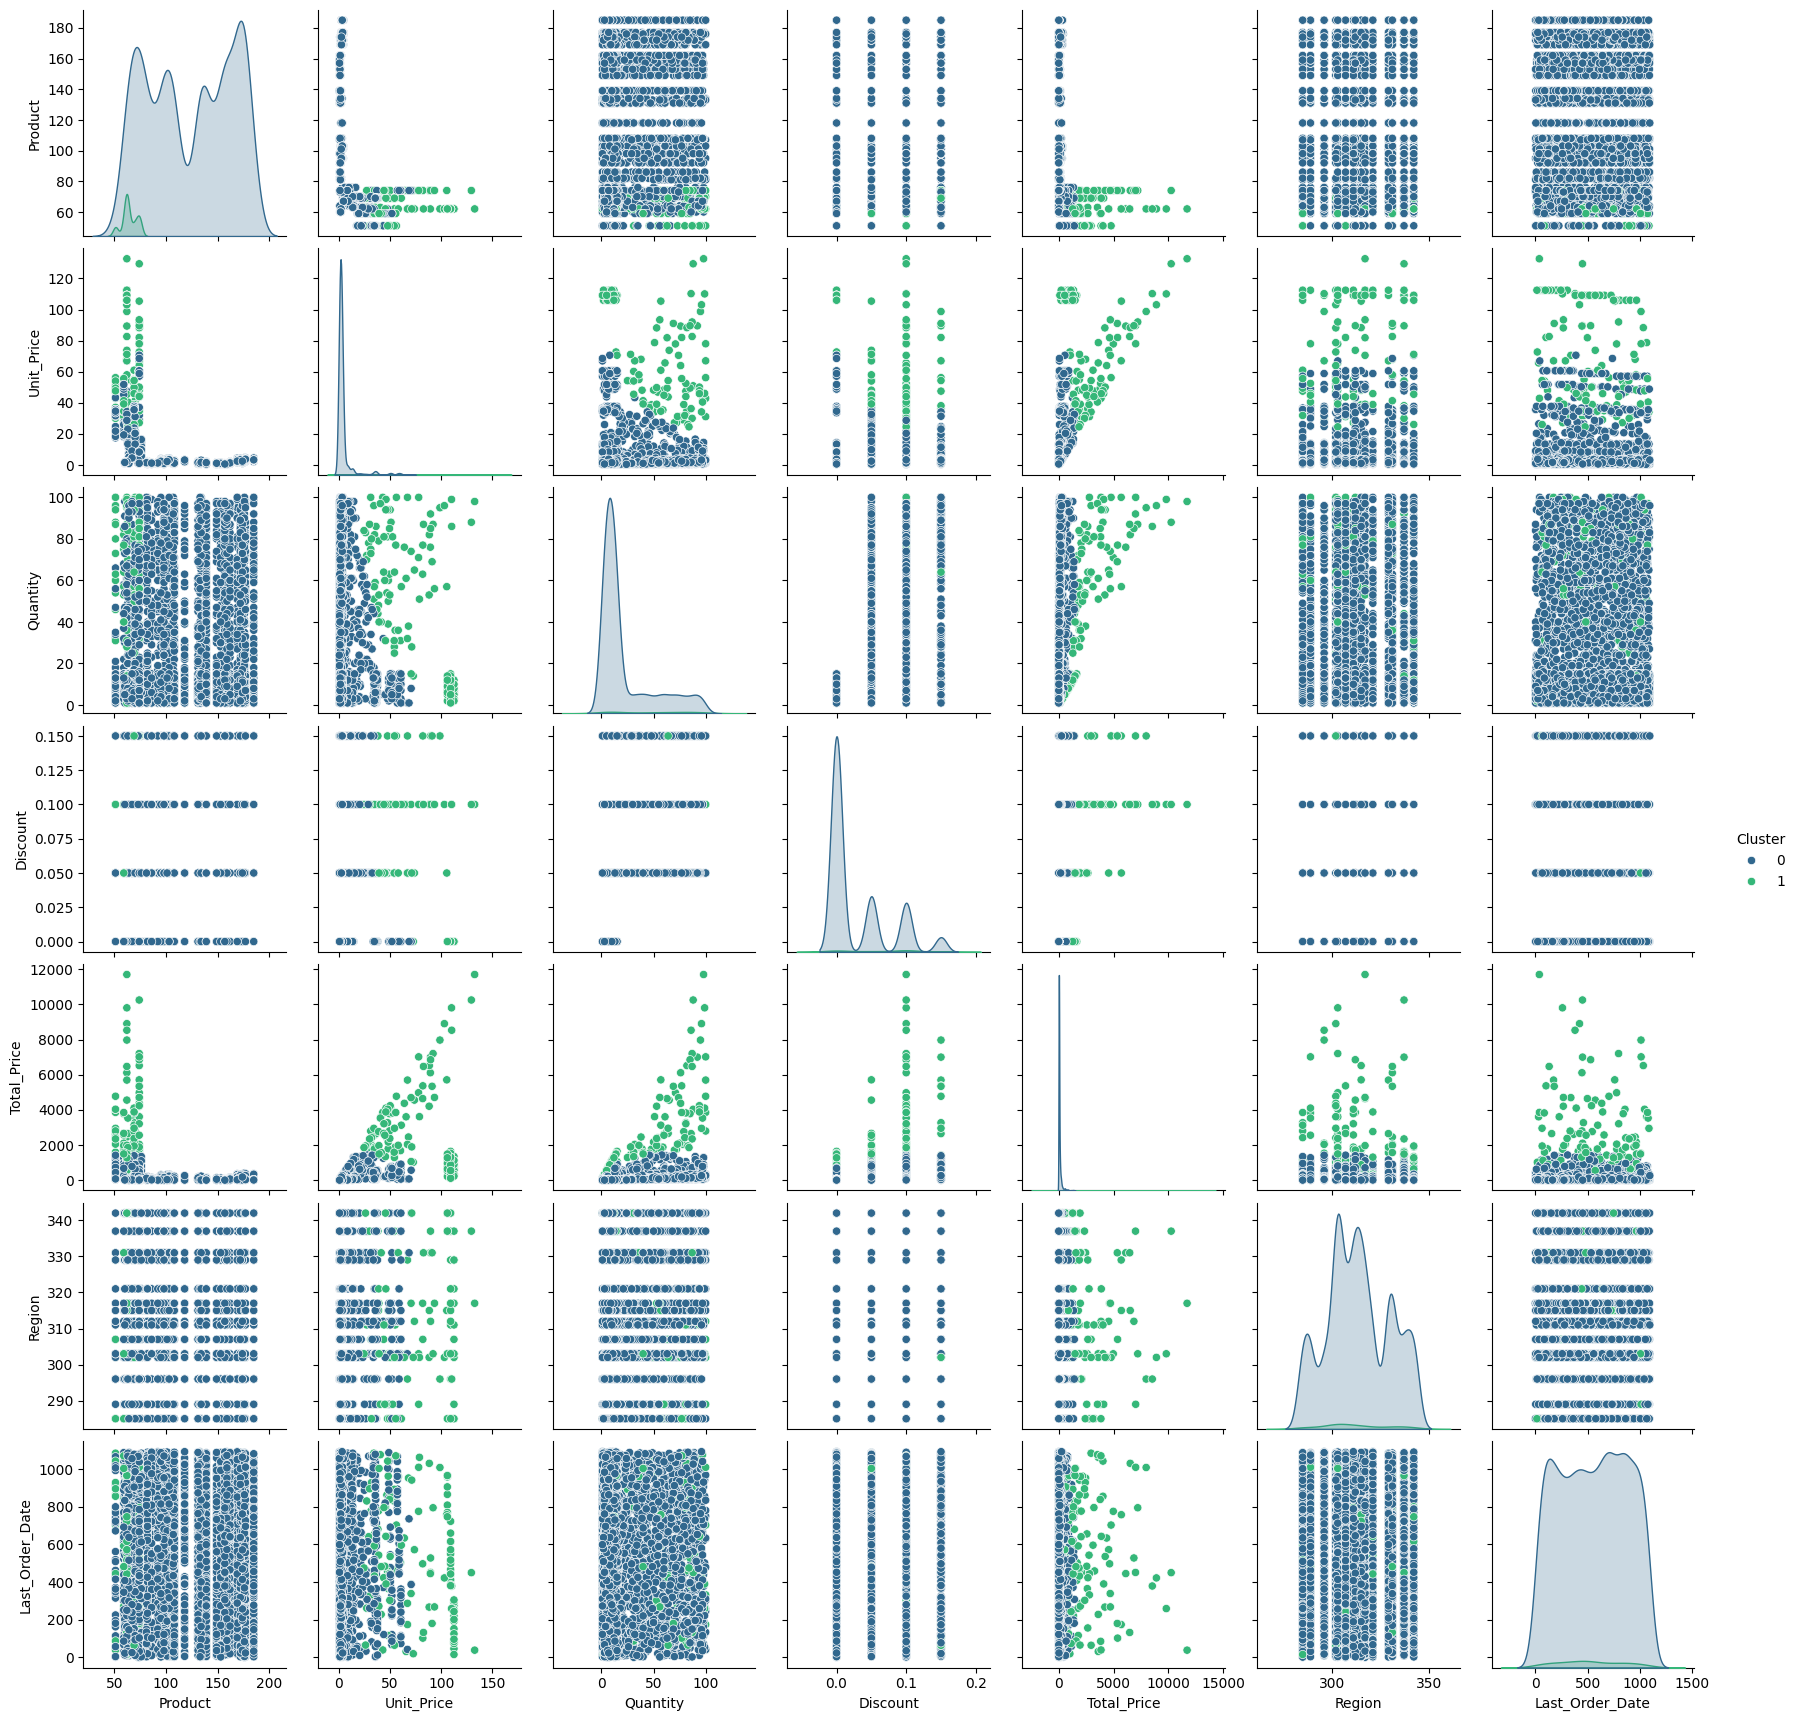

In [171]:
numeric_features = df_final.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Cluster')
sns.pairplot(df_final, hue="Cluster", vars=numeric_features, palette="viridis")
plt.show()

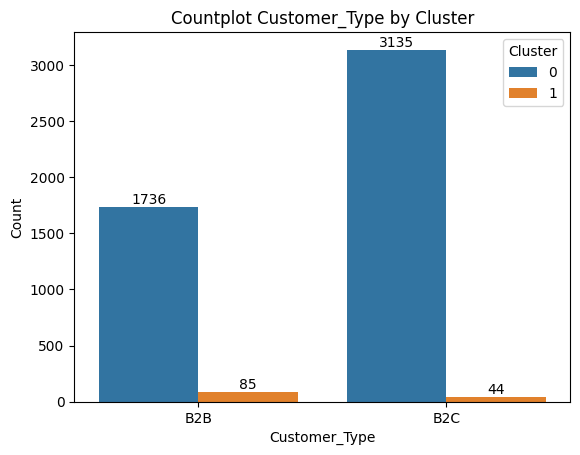

In [ ]:
ax = sns.countplot(data=df_final, x='Customer_Type', hue='Cluster')
# Loop untuk menambahkan label di atas masing-masing bar
for p in ax.patches:
    height = p.get_height()
    # Pastikan hanya menambahkan label jika height > 0
    if height > 0:
        ax.annotate(
            f'{int(height)}',                   # teks label (dibulatkan ke int)
            (p.get_x() + p.get_width() / 2, height),  # posisi koordinat (x, y)
            ha='center',                        # horizontal alignment center
            va='bottom'                         # vertical alignment bottom
        )
plt.title('Countplot Customer_Type by Cluster')
plt.xlabel('Customer_Type')
plt.ylabel('Count')
plt.show()

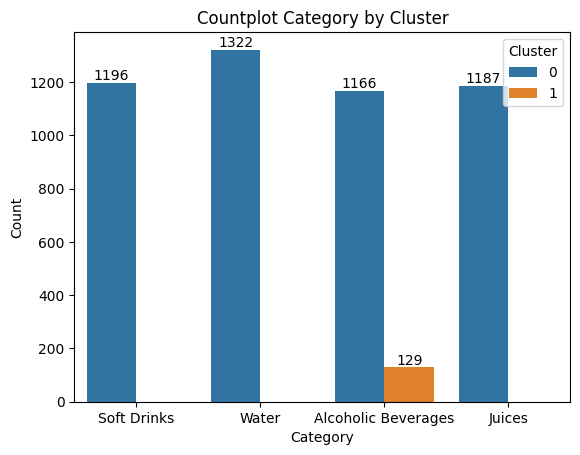

In [175]:
ax = sns.countplot(data=df_final, x='Category', hue='Cluster')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom'
        )
plt.title('Countplot Category by Cluster')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

## **Cluster 1 (Label: 0)**

1. **Jenis Produk yang Dibeli**  
   - Berdasarkan grafik, hampir semua kategori produk (Soft Drinks, Water, Alcoholic Beverages, dan Juices) paling banyak dibeli oleh pelanggan di Cluster 1.  
   - Artinya, pelanggan di cluster ini cenderung memiliki kebiasaan belanja yang **beragam** dan tidak terfokus pada satu jenis produk saja.

2. **Tipe Pelanggan (B2B vs B2C)**  
   - Mayoritas pelanggan di cluster ini ternyata **B2C**, tapi masih ada cukup banyak pelanggan B2B juga.  
   - Ini menunjukkan bahwa **cluster ini sangat luas**, mencakup berbagai tipe pembeli, mulai dari individu hingga bisnis.

3. **Karakteristik Transaksi (Berdasarkan Pairplot)**  
   - Rentang **Quantity, Price, Revenue, Profit, dan Cost** cukup lebar, menandakan adanya variasi yang besar dalam pola pembelian (ada yang beli sedikit, ada yang beli banyak, dan seterusnya).  
   - Diskon yang diberikan juga bervariasi, mulai dari **sangat kecil** hingga menengah.

4. **Analisis Singkat**  
   - Cluster 1 adalah kelompok pelanggan terbesar dan paling **umum**.  
   - Karena sifatnya yang beragam, strategi pemasaran yang cocok untuk cluster ini bisa berupa **promo massal** atau penawaran umum (misalnya diskon khusus hari raya, promo bundle, dll.) agar dapat menjangkau berbagai preferensi.

---

## **Cluster 2 (Label: 1)**

1. **Jenis Produk yang Dibeli**  
   - Terlihat jelas bahwa cluster ini **hampir sepenuhnya membeli Alcoholic Beverages** (minuman beralkohol).  
   - Dengan kata lain, mereka termasuk **segmen spesifik** yang fokus pada satu jenis produk saja.

2. **Tipe Pelanggan (B2B vs B2C)**  
   - Meskipun jumlahnya tidak sebanyak di Cluster 1, di dalam cluster ini ada pembeli B2B dan B2C. Namun, porsi B2B terlihat sedikit lebih besar.  
   - Ini bisa menunjukkan bahwa pelanggan bisnis (mungkin restoran, bar, atau kafe) menjadi penyumbang utama penjualan minuman beralkohol, dengan sebagian kecil pelanggan individu yang juga membeli.

3. **Karakteristik Transaksi (Berdasarkan Pairplot)**  
   - Dibandingkan dengan Cluster 1, rentang **Quantity, Price, Revenue, Profit, dan Cost** lebih sempit, menandakan pola pembelian yang cenderung **seragam** (mungkin jumlah pembelian dalam kisaran tertentu, tidak terlalu ekstrem).  
   - Diskon pun tampak tidak terlalu bervariasi.

4. **Analisis Singkat**  
   - Cluster 2 adalah **kelompok khusus** yang fokus pada minuman beralkohol.  
   - Strategi yang tepat untuk mereka adalah menyiapkan **penawaran atau promo yang lebih spesifik** (misalnya diskon khusus untuk pembelian dalam jumlah besar, paket event minuman beralkohol, dll.).  
   - Bagi pelanggan B2B seperti restoran/kafe, Anda dapat menegosiasikan kerja sama jangka panjang atau program loyalitas.

---

### **Kesimpulan dan Saran**
- **Cluster 1**: Pelanggan paling besar dan beragam, cocok untuk **strategi pemasaran umum** dengan penawaran luas.  
- **Cluster 2**: Pelanggan khusus minuman beralkohol, cocok untuk **promosi yang lebih fokus**, misalnya paket event, diskon khusus, atau kerja sama jangka panjang dengan bisnis terkait.  

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [176]:
df_final.to_csv('beverage_labeled.csv', index=False)